In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

In [47]:
data = pd.read_csv("Titanic Dataset.csv")

In [48]:
data = data.drop(columns=['Name'], axis = 1)

In [49]:
data.head(5)

,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass,Survived
0,male,22.0,1,0,7.2500,3,0
1,female,38.0,1,0,71.2833,1,1
2,female,26.0,0,0,7.9250,3,1
3,female,35.0,1,0,53.1000,1,1
4,male,35.0,0,0,8.0500,3,0


## Please do a simple EDA for the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CFB3E09BE0>,
      dtype=object)

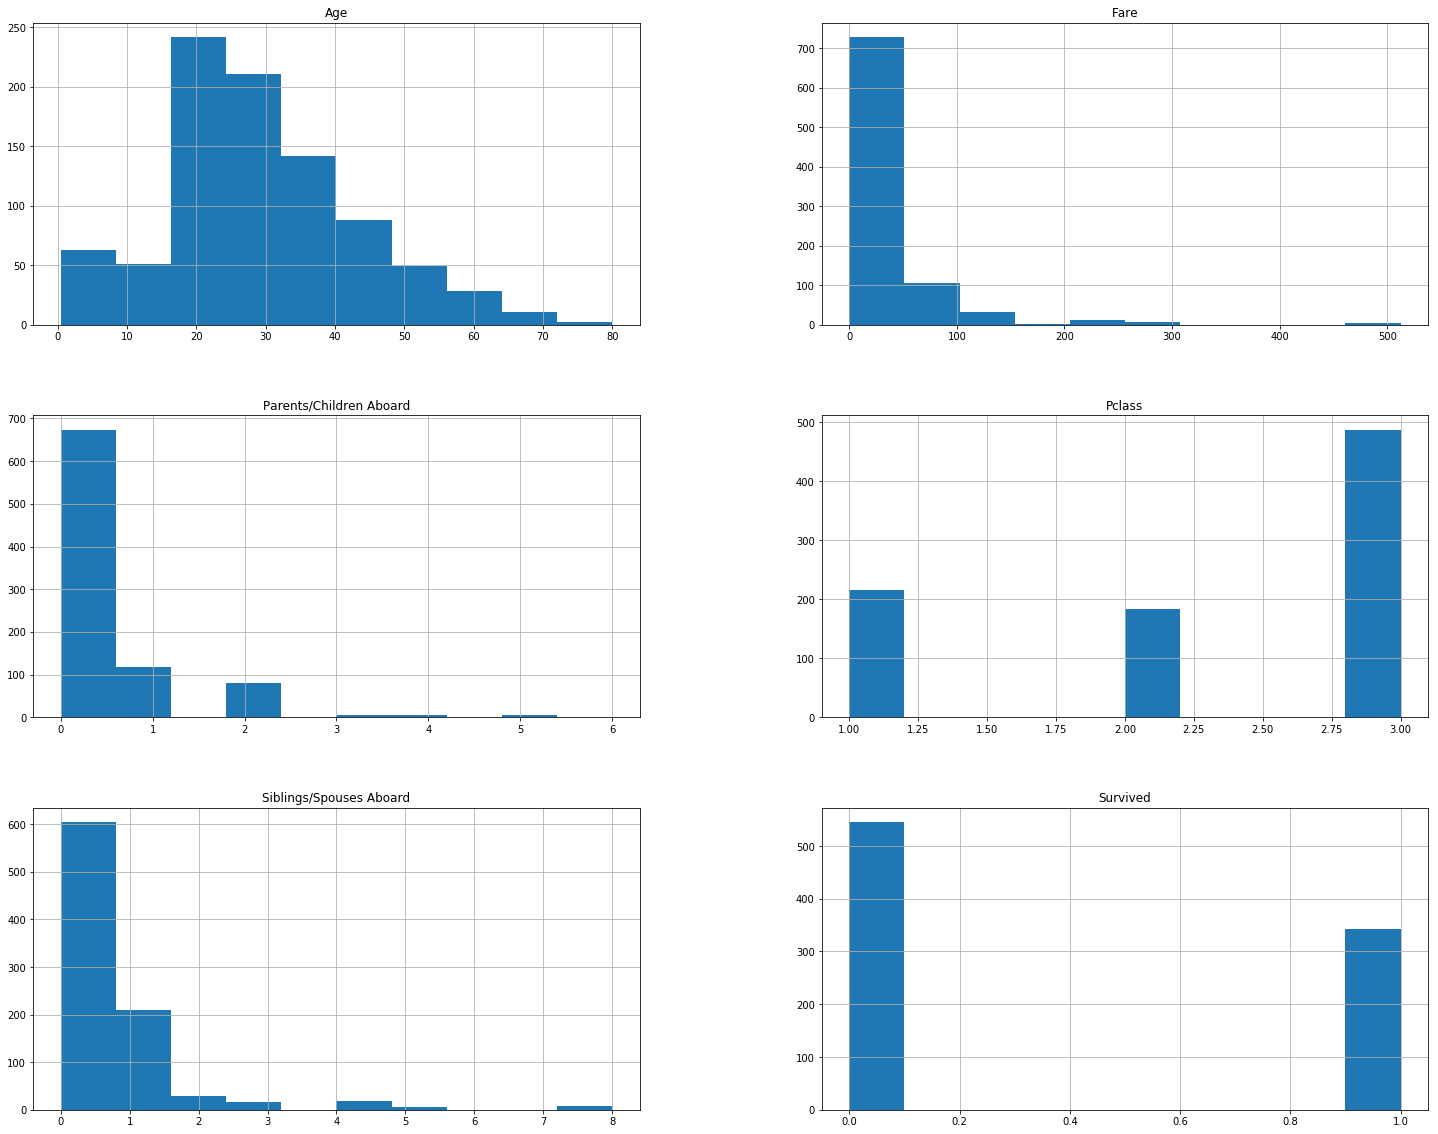

In [50]:
data.hist(figsize=(25,20))

In [51]:
def survival_stacked_bar(variable):
    Died=data[data["Survived"]==0][variable].value_counts()/len(data["Survived"]==0)
    Survived=data[data["Survived"]==1][variable].value_counts()/len(data["Survived"]==1)
    data_DS=pd.DataFrame([Died,Survived])
    data_DS.index=["Did not survived","Survived"]
    data_DS.plot(kind="bar",stacked=True,title="Percentage")
    return data_DS.head()

,1,2,3
Did not survived,0.090192,0.109357,0.414882
Survived,0.153326,0.098083,0.134160


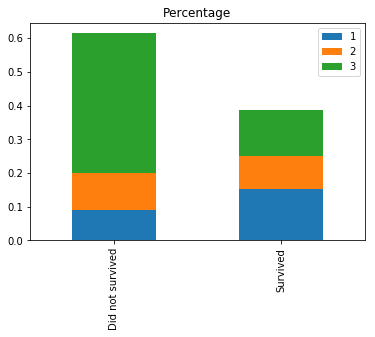

In [52]:
survival_stacked_bar("Pclass")

Among all survivors, people of class 1 is the most. The fair of class 1 is the most expensive. Maybe rich people got courtesy that they had priority to go on the lifeboats when the ship was sinking.

,male,female
Did not survived,0.523112,0.091319
Survived,0.122886,0.262683


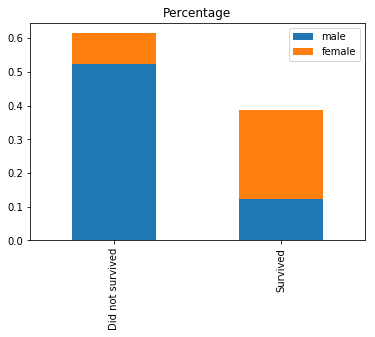

In [53]:
survival_stacked_bar("Sex")

Among all survivors, the woman is the most. Maybe the men gave their seats of the lifeboats to the women. Hence, the survivor rate of the female is higher than the one of male.

,0,1,2,3,4,5,8
Did not survived,0.444194,0.109357,0.016911,0.013529,0.016911,0.005637,0.007892
Survived,0.236753,0.126268,0.014656,0.004510,0.003382,NaN,NaN


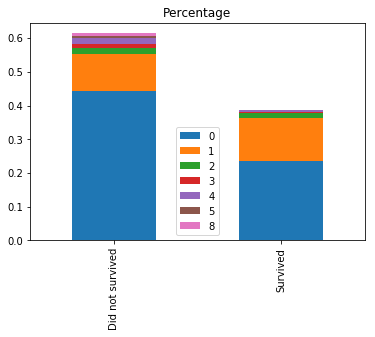

In [54]:
survival_stacked_bar("Siblings/Spouses Aboard")

,0,1,2,3,4,5,6
Did not survived,0.497182,0.059752,0.045096,0.002255,0.00451,0.004510,0.001127
Survived,0.262683,0.073281,0.045096,0.003382,NaN,0.001127,NaN


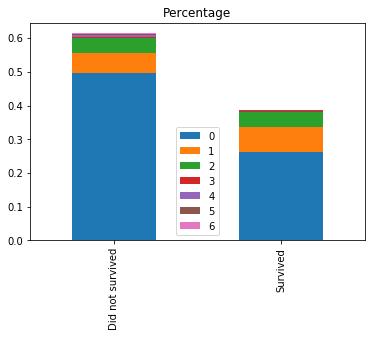

In [55]:
survival_stacked_bar("Parents/Children Aboard")

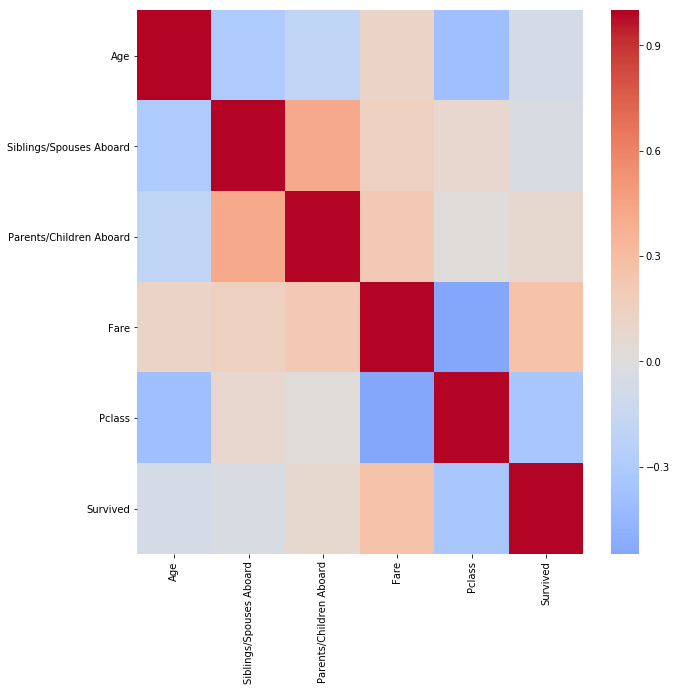

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = False, center=0.0, cmap='coolwarm'); # cmap="YlGnBu",
plt.show()

## Pre-process the continuous and discrete data.

In [6]:
sex = data.loc[:,'Sex']

In [7]:
sex_dummy = pd.get_dummies(sex)

In [8]:
sex_dummy.head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [9]:
sex_dummy = sex_dummy.drop(columns = ['female'])

In [10]:
sex_data = pd.DataFrame(sex_dummy)

In [11]:
new_data = pd.concat([data,sex_data], axis=1)

In [12]:
newdata = new_data.drop(columns=['Sex'], axis = 1)

In [13]:
newdata.head(5)

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass,Survived,male
0,22.0,1,0,7.2500,3,0,1
1,38.0,1,0,71.2833,1,1,0
2,26.0,0,0,7.9250,3,1,0
3,35.0,1,0,53.1000,1,1,0
4,35.0,0,0,8.0500,3,0,1


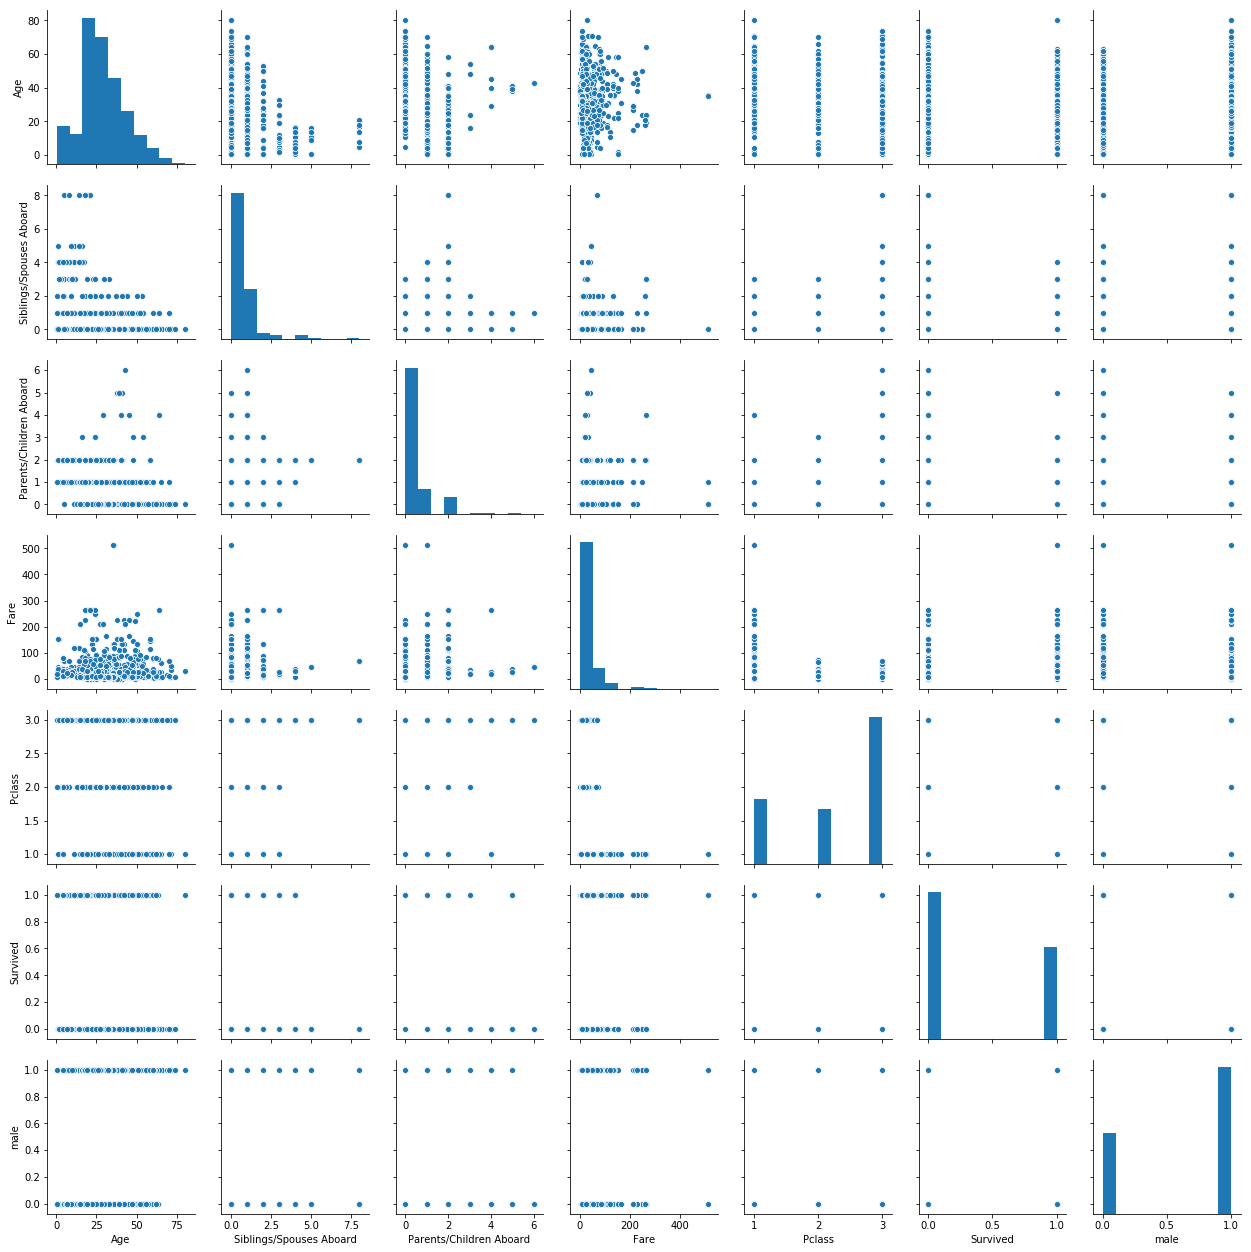

In [16]:
sns.pairplot(newdata)

1. It seems that the mid-age people can afford the most expensive place on the boat.

2. Two of the third passengers are males.

In [17]:
newdata.describe()

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass,Survived,male
count,887.000000,887.000000,887.000000,887.00000,887.000000,887.000000,887.000000
mean,29.471443,0.525366,0.383315,32.30542,2.305524,0.385569,0.645998
std,14.121908,1.104669,0.807466,49.78204,0.836662,0.487004,0.478480
min,0.420000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
25%,20.250000,0.000000,0.000000,7.92500,2.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,14.45420,3.000000,0.000000,1.000000
75%,38.000000,1.000000,0.000000,31.13750,3.000000,1.000000,1.000000
max,80.000000,8.000000,6.000000,512.32920,3.000000,1.000000,1.000000


1. The age of people on this ship are from 0 to 80. The average age is 29. 

2. According to the above table, The 50% quantile and 25% is 0. The 75% quantile is 1. Hence, most of the people on the vessel are accompanied by upmost one friend.

3. The minimum value of Fare, 0, is a bit weird. Maybe someone got free entertainment.

In [18]:
y = newdata.loc[:,'Survived']

In [19]:
newdata = newdata.drop(columns = ['Survived'], axis = 1)

## Build the logistic regression model.

In [20]:
from sklearn.model_selection import train_test_split
seed = 514
#Spilt the data as train set : test set = 8:2
X_train, X_test, y_train, y_test = train_test_split(newdata.loc[:,:], y, test_size=0.2, random_state = seed) 

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# 印出係數
print(logreg.coef_)
# 印出截距
print(logreg.intercept_ )

[[-0.03077657 -0.31547291 -0.07806359  0.00582227 -0.88823514 -2.45718374]]
[3.96664095]


In [23]:
import numpy as np
np.round(logreg.predict_proba(X_test),3)

array([[0.107, 0.893],
       [0.871, 0.129],
       [0.338, 0.662],
       [0.835, 0.165],
       [0.3  , 0.7  ],
       [0.857, 0.143],
       [0.848, 0.152],
       [0.391, 0.609],
       [0.062, 0.938],
       [0.904, 0.096],
       [0.887, 0.113],
       [0.449, 0.551],
       [0.917, 0.083],
       [0.925, 0.075],
       [0.392, 0.608],
       [0.535, 0.465],
       [0.848, 0.152],
       [0.586, 0.414],
       [0.643, 0.357],
       [0.875, 0.125],
       [0.641, 0.359],
       [0.893, 0.107],
       [0.849, 0.151],
       [0.547, 0.453],
       [0.445, 0.555],
       [0.914, 0.086],
       [0.945, 0.055],
       [0.848, 0.152],
       [0.847, 0.153],
       [0.132, 0.868],
       [0.91 , 0.09 ],
       [0.893, 0.107],
       [0.634, 0.366],
       [0.238, 0.762],
       [0.857, 0.143],
       [0.721, 0.279],
       [0.94 , 0.06 ],
       [0.88 , 0.12 ],
       [0.238, 0.762],
       [0.668, 0.332],
       [0.841, 0.159],
       [0.41 , 0.59 ],
       [0.636, 0.364],
       [0.5

## Predict the data and show the confusion matrix. Please explain it in details.

In [24]:
from sklearn.metrics import confusion_matrix
cnf_logreg=confusion_matrix(y_test,logreg.predict(X_test))

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [57]:
def Measures(conf_matrix):
    
    TP, FP, FN, TN = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    # F1 score
    F1 = (2*TP)/(2*TP+FN+FP)
    
    return TPR, ACC, F1

In [26]:
target_names = [ 'Die', 'Survive']

Confusion matrix, without normalization
[[104  16]
 [ 20  38]]


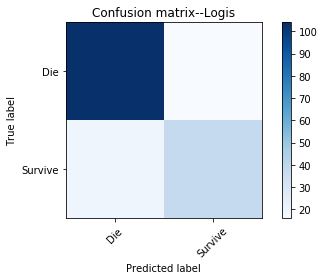

In [27]:
plot_confusion_matrix(cnf_logreg, classes=target_names,normalize=False,title="Confusion matrix--Logis")

In [58]:
Measures(cnf_logreg)

(0.8387096774193549, 0.797752808988764, 0.8524590163934426)

The confusion matrix shows that the logistic model can correctly predict that the 104 people would unfortunely die in the accident and 38 passengers would survive.

Yet, 20 test samples that would survive would be incorrectly predicted as a casualty by the model. That's false negative.

16 test samples that would die would be mistakenly forecasted as a survivor. That is called false positive.

F1 = 0.8524590163934426

## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
cnf_KNN=confusion_matrix(y_test,KNN.predict(X_test))

Confusion matrix, without normalization
[[94 26]
 [26 32]]


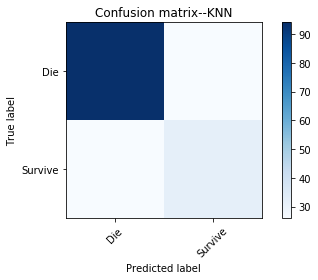

In [30]:
plot_confusion_matrix(cnf_KNN, classes=target_names,normalize=False,title="Confusion matrix--KNN")

In [59]:
Measures(cnf_KNN)

(0.7833333333333333, 0.7078651685393258, 0.7833333333333333)

The performance of the KNN model is inferior to the one of the logistic regression.

Its true positive rate is 94/178. Also, its true negative rate is 32/178. F1 = 0.7833333333333333

However, the KNN model's false positive rate and false negative rate are both 26/178.

In [31]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
cnf_DecisionTree=confusion_matrix(y_test,DecisionTree.predict(X_test))

Confusion matrix, without normalization
[[93 27]
 [16 42]]


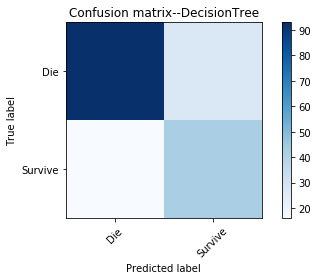

In [33]:
plot_confusion_matrix(cnf_DecisionTree, classes=target_names,normalize=False,title="Confusion matrix--DecisionTree")

In [60]:
Measures(cnf_DecisionTree)

(0.8532110091743119, 0.7584269662921348, 0.8122270742358079)

The decision tree model is able to accurately predict 93 test samples as victims and 42 test samples as survivors.

Its false positive rate is 27/178. Also, its false negative rate is 16/178. F1 = 0.8122270742358079

So far, the logistic regression still has best performance that measured by the false positive rate and the false negative rate.

In [34]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
cnf_RandomForest=confusion_matrix(y_test,RandomForest.predict(X_test))

Confusion matrix, without normalization
[[103  17]
 [ 20  38]]


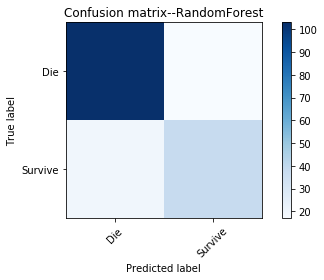

In [36]:
plot_confusion_matrix(cnf_RandomForest, classes=target_names,normalize=False,title="Confusion matrix--RandomForest")

In [61]:
Measures(cnf_RandomForest)

(0.8373983739837398, 0.7921348314606742, 0.8477366255144033)

The random forest model is able to accurately predict 103 test samples as victims and 38 test samples as survivors.

Its false positive rate is 17/178. Also, its false negative rate is 20/178. F1 = 0.8477366255144033

The performance of accuracy is close to the one of logistic regression.

In [37]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', probability = True)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
cnf_svm=confusion_matrix(y_test,svm.predict(X_test))

Confusion matrix, without normalization
[[101  19]
 [ 21  37]]


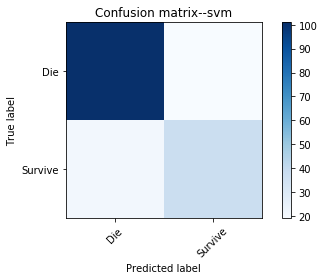

In [39]:
plot_confusion_matrix(cnf_svm, classes=target_names,normalize=False,title="Confusion matrix--svm")

In [62]:
Measures(cnf_svm)

(0.8278688524590164, 0.7752808988764045, 0.8347107438016529)

The SVM model is able to accurately predict 101 test samples as victims and 37 test samples as survivors.

Its false positive rate is 19/178. Also, its false negative rate is 21/178. F1 = 0.8347107438016529

In [40]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [41]:
from keras import models
from keras import layers
#import keras_metrics

# build NN model
model = models.Sequential()
model.add(layers.Dense(units = 16, activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(units = 16, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy', f1_m, recall_m])

# start training
history = model.fit(X_train, y_train, epochs = 20, batch_size = 128)

Epoch 1/20
709/709 [==============================] - 0s 271us/step - loss: 1.3792 - accuracy: 0.6587 - f1_m: 0.3824 - recall_m: 0.2939
Epoch 2/20
709/709 [==============================] - 0s 13us/step - loss: 0.8376 - accuracy: 0.6770 - f1_m: 0.5492 - recall_m: 0.5013
Epoch 3/20
709/709 [==============================] - 0s 13us/step - loss: 0.7136 - accuracy: 0.6714 - f1_m: 0.5579 - recall_m: 0.5316
Epoch 4/20
709/709 [==============================] - 0s 11us/step - loss: 0.6824 - accuracy: 0.6544 - f1_m: 0.5574 - recall_m: 0.5608
Epoch 5/20
709/709 [==============================] - 0s 14us/step - loss: 0.7212 - accuracy: 0.6333 - f1_m: 0.4428 - recall_m: 0.4421
Epoch 6/20
709/709 [==============================] - 0s 13us/step - loss: 0.6714 - accuracy: 0.6629 - f1_m: 0.5823 - recall_m: 0.5947
Epoch 7/20
709/709 [==============================] - 0s 13us/step - loss: 0.6551 - accuracy: 0.6714 - f1_m: 0.5552 - recall_m: 0.5323
Epoch 8/20
709/709 [==============================] - 

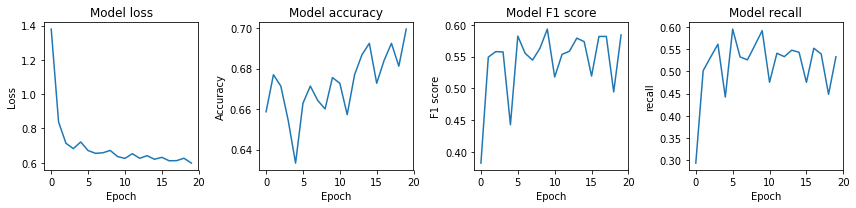

In [42]:
plt.figure(figsize=(12,3))

# Plot the loss of the model.
plt.subplot(1, 4, 1)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Plot the accuracy of the model.
plt.subplot(1, 4, 2)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Plot the F1 score of the model.
plt.subplot(1, 4, 3)
plt.plot(history.history['f1_m'])
plt.title('Model F1 score')
plt.ylabel('F1 score')
plt.xlabel('Epoch')

# Plot the recall of the model.
plt.subplot(1, 4, 4)
plt.plot(history.history['recall_m'])
plt.title('Model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')

plt.tight_layout()

# Evaluate the model
# loss, accuracy, f1_score, recall = model.evaluate(X_test, y_test, verbose=0)
# print(loss, accuracy, f1_score, recall)

In [43]:
nn_ConfMatrix = confusion_matrix(y_test, model.predict_classes(X_test))

Confusion matrix, without normalization
[[84 36]
 [28 30]]


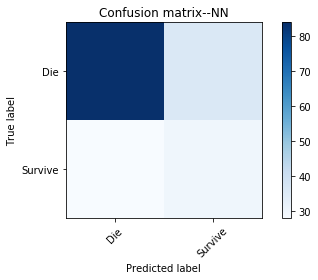

In [44]:
plot_confusion_matrix(nn_ConfMatrix, classes=target_names,normalize=False,title="Confusion matrix--NN")

In [63]:
Measures(nn_ConfMatrix)

(0.75, 0.6404494382022472, 0.7241379310344828)

The NN model is able to accurately predict 84 test samples as victims and 30 test samples as survivors.

Its false positive rate is 36/178. Also, its false negative rate is 28/178. F1 = 0.7241379310344828

Although the NN model is complex, the performance of NN model is still inferior to the one of logistic regression model.

## Among all these questions, what is your best result? Explain why you regard it as the best result.

In my opinion, the logistic regression model provides the best result since its most accurate performance.